# Kernel regression
This notebook conatins example of kernel regression using KernelRegressor

In [1]:
import rawpy

import numpy as np
import matplotlib.pyplot as plt


from skimage.transform import resize
from skimage.color import rgb2gray
from kernel_regressor import KernelRegressor

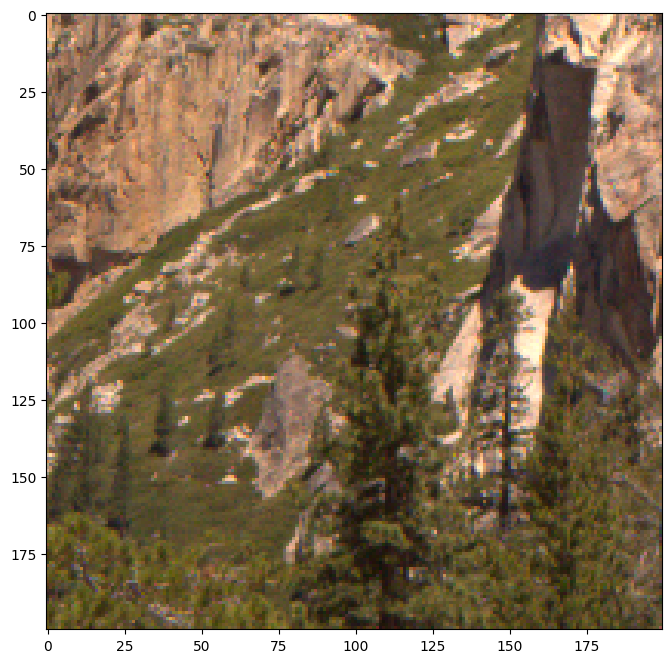

In [2]:
img_raw = rawpy.imread('./imgs1/20171106_subset_bursts_0006_20160722_115157_431_payload_N001.dng')
#img = rawpy.imread('./imgs2/20171106_bursts_0006_20160722_101432_847_payload_N000.dng')
img_rgb = img_raw.postprocess(half_size=True)
img_s = resize(img_rgb, (img_rgb.shape[0]//2, img_rgb.shape[1]//2), anti_aliasing=True)

up, down, left, right = 1200, 1400, 300, 500
img = img_rgb[up:down,left:right]
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img)

In [3]:
kr = KernelRegressor()

In [4]:
# gray_img = rgb2gray(img)
str_tensors = kr.get_structure_tensor(img)


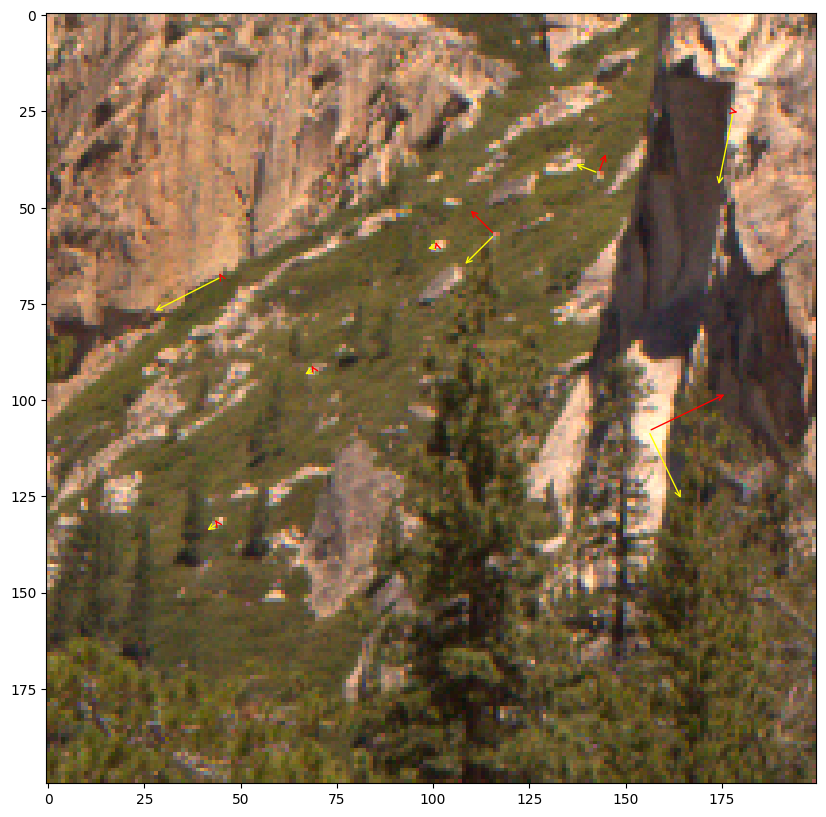

In [5]:
positions = [[132, 44], [68, 45], [25, 178], [41, 143], [108, 156], [57, 116], [60, 101], [92, 69]]

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img.astype(np.uint8))
scale = 10
for pos in positions:
    str_tensor = str_tensors[pos[0]][pos[1]]
    vals, vecs = np.linalg.eig(str_tensor)
    _, k1, k2 = kr.covariance_regression(str_tensor)
    k1 = min(k1, 2)
    k2 = max(k2, 0.1)
    
    
    if vals[1] < vals[0]:
        vecs = vecs[:,::-1]
        vals = vals[::-1]
    

    dx = scale * k2 * vecs[0][1]
    dy = scale * k2 * vecs[1][1] #(минус потому что в программе ось Оу направлена вниз)
    arrowprops = {
            'arrowstyle': '->',
            'color': 'red' if vals[1] > vals[0] else 'yellow',
        }
    ax.annotate('',
                 xy=(pos[1] + dx, pos[0] + dy),
                 xytext=(pos[1], pos[0]),
                 color='red' if vals[1] > vals[0] else 'yellow',
                 arrowprops=arrowprops)
    
    
    dx = scale * k1 * vecs[0][0]
    dy = scale * k1 * vecs[1][0]
    arrowprops = {
            'arrowstyle': '->',
            'color': 'yellow' if vals[1] > vals[0] else 'red',
        }
    ax.annotate('',
                 xy=(pos[1] + dx, pos[0] + dy),
                 xytext=(pos[1], pos[0]),
                 color='yellow' if vals[1] > vals[0] else 'red',
                 arrowprops=arrowprops)


In [6]:
map_of_weights = kr.process_channel(rgb2gray(img), np.zeros((img.shape[0], img.shape[1], 2)), size=5, silent=False)

Got structure_tensor
Got cov matrices
Got weights
